In [ ]:
from google.colab import files
uploaded = files.upload()

Saving News.csv to News.csv


In [ ]:
import pandas as pd

df = pd.read_csv('News.csv')
print("Original dataset shape:", df.shape)
df.head()



Original dataset shape: (12520, 2)


,text,label
0,sing praise mahinda lose voice sri lanka disro...,1
1,kojc rally first time davao city appoint son god,1
2,bill gate people resist mrna tsunami exclude s...,1
3,cure covid19 forward budesonide asthma drug pl...,1
4,president trump form patriot party 81 day elec...,1


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and numbers
    tokens = re.findall(r'\b\w+\b', text)  # Simple regex tokenization
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)
df['clean_textt'] = df['text'].apply(preprocess_text)
df.head()


,text,label,clean_text,clean_textt
0,sing praise mahinda lose voice sri lanka disro...,1,sing praise mahinda lose voice sri lanka disro...,sing praise mahinda lose voice sri lanka disro...
1,kojc rally first time davao city appoint son god,1,kojc rally first time davao city appoint son god,kojc rally first time davao city appoint son god
2,bill gate people resist mrna tsunami exclude s...,1,bill gate people resist mrna tsunami exclude s...,bill gate people resist mrna tsunami exclude s...
3,cure covid19 forward budesonide asthma drug pl...,1,cure covid19 forward budesonide asthma drug pl...,cure covid19 forward budesonide asthma drug pl...
4,president trump form patriot party 81 day elec...,1,president trump form patriot party 81 day elec...,president trump form patriot party 81 day elec...


In [ ]:
!pip install wordcloud

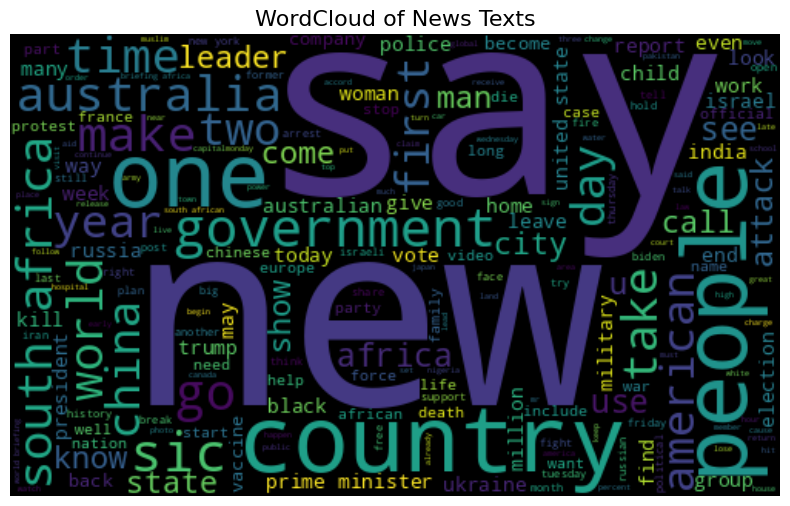

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_text = " ".join(df['clean_textt'].astype(str))

wordcloud = WordCloud(width=500, height=300, background_color='black').generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of News Texts", fontsize=16)
plt.show()


In [ ]:
df['clean_text'] = df['clean_textt'].apply(lambda x: x.split())
df['clean_text']

,clean_text
0,"[sing, praise, mahinda, lose, voice, sri, lank..."
1,"[kojc, rally, first, time, davao, city, appoin..."
2,"[bill, gate, people, resist, mrna, tsunami, ex..."
3,"[cure, covid19, forward, budesonide, asthma, d..."
4,"[president, trump, form, patriot, party, 81, d..."
...,...
12515,"[kosher, economy, businesse, israel, include, ..."
12516,"[scene, authority, force, vaccination, people,..."
12517,"[world, briefing, africa, south, africa, setba..."
12518,"[text, image, read, daniel, andrew, net, worth..."


In [ ]:
all_words = sum(df['clean_text'], [])
all_words = list(set(all_words))

encoded_words = []

for words in df['clean_text']:

    encoded = [1 if word in words else 0 for word in all_words]
    encoded_words.append(encoded)

encoded_df = pd.DataFrame(encoded_words, columns=all_words)

print(encoded_df)

       420  petrella  opennhow  notification  rb  manje  genre  reformist  \
0        0         0         0             0   0      0      0          0   
1        0         0         0             0   0      0      0          0   
2        0         0         0             0   0      0      0          0   
3        0         0         0             0   0      0      0          0   
4        0         0         0             0   0      0      0          0   
...    ...       ...       ...           ...  ..    ...    ...        ...   
12515    0         0         0             0   0      0      0          0   
12516    0         0         0             0   0      0      0          0   
12517    0         0         0             0   0      0      0          0   
12518    0         0         0             0   0      0      0          0   
12519    0         0         0             0   0      0      0          0   

       patience  tarique  ...  insomnia  houche  apache  1092021  \
0      

In [ ]:
print((encoded_df.sum(axis=1) > 0).all())

True


In [ ]:
print(encoded_df.sum(axis=1))

0        14
1         9
2        24
3        29
4        16
         ..
12515    14
12516    12
12517    58
12518    19
12519     8
Length: 12520, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X = encoded_df
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (10016, 30365)
Shape of y_train: (10016,)
Shape of X_test: (2504, 30365)
Shape of y_test: (2504,)


# 1.LogisticRegression Alogrithm :

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score,recall_score, precision_score, f1_score, roc_auc_score

model = LogisticRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, model.predict(X_train))
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_probs)



print("The accuracy on training set of logistic regression:", round(accuracy_train * 100, 2), "%")
print("The accuracy on testing set of logistic regression:", round(accuracy_test * 100, 2), "%")
print("Recall: ",round(recall * 100, 2), "%")
print("Precision: ",round(precision * 100, 2), "%")
print("F1-Score:",round(f1 * 100, 2), "%")
print("AUC Score:", round(auc * 100, 2), "%")


The accuracy on training set of logistic regression: 99.89 %
The accuracy on testing set of logistic regression: 93.21 %
Recall:  95.99 %
Precision:  92.53 %
F1-Score: 94.23 %
AUC Score: 98.2 %


##*confusion matrix*

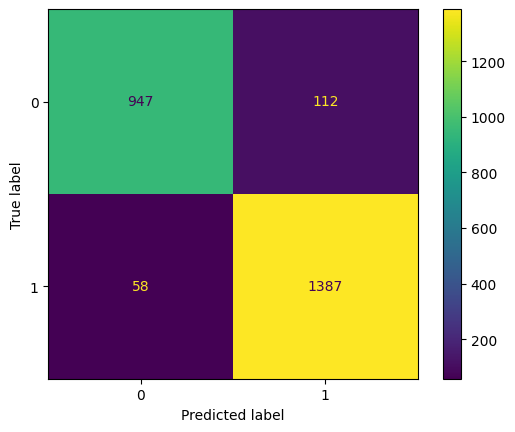

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


## *roc curve*

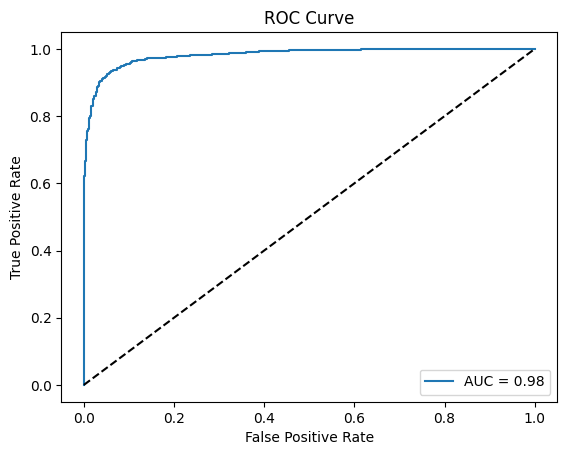

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# 2.  random forest (RF) Algorithm :

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score,recall_score, precision_score, f1_score, roc_auc_score

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

accuracy_train = accuracy_score(y_train, rf.predict(X_train))
accuracy_test = accuracy_score(y_test, rf_y_pred)

recall = recall_score(y_test, rf_y_pred)
precision = precision_score(y_test, rf_y_pred)
f1 = f1_score(y_test, rf_y_pred)
auc = roc_auc_score(y_test, y_probs)



print("The accuracy on training set of random forest:", round(accuracy_train * 100, 2), "%")
print("The accuracy on testing set of random forest:", round(accuracy_test * 100, 2), "%")
print("Recall: ",round(recall * 100, 2), "%")
print("Precision: ",round(precision * 100, 2), "%")
print("F1-Score:",round(f1 * 100, 2), "%")
print("AUC Score:", round(auc * 100, 2), "%")


The accuracy on training set of random forest: 100.0 %
The accuracy on testing set of random forest: 91.29 %
Recall:  95.29 %
Precision:  90.18 %
F1-Score: 92.66 %
AUC Score: 98.2 %


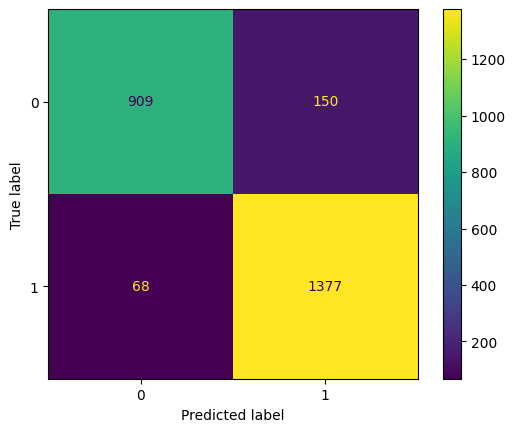

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rf_y_pred)
ConfusionMatrixDisplay(cm).plot()


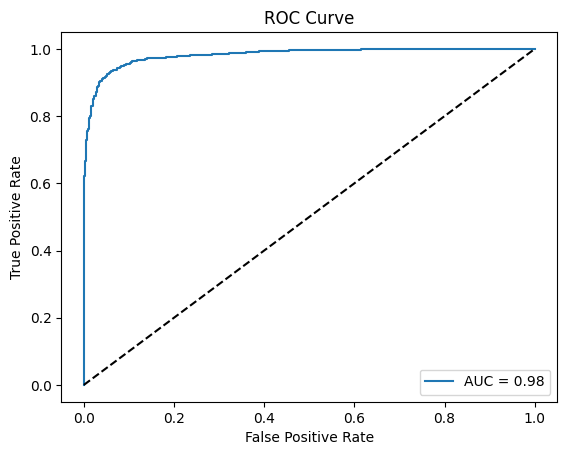

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# 3. naive_bayes algorithm :




In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import  accuracy_score,recall_score, precision_score, f1_score, roc_auc_score

nb = MultinomialNB()
nb.fit(X_train, y_train)

nb_y_pred = nb.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]


accuracy_train = accuracy_score(y_train, nb.predict(X_train))
accuracy_test = accuracy_score(y_test, nb_y_pred)

recall = recall_score(y_test, nb_y_pred)
precision = precision_score(y_test, nb_y_pred)
f1 = f1_score(y_test, nb_y_pred)
auc = roc_auc_score(y_test, nb_y_pred)


print("The accuracy on training set of naive_bayes:", round(accuracy_train * 100, 2), "%")
print("The accuracy on testing set of naive_bayes:", round(accuracy_test * 100, 2), "%")
print("Recall: ",round(recall * 100, 2), "%")
print("Precision: ",round(precision * 100, 2), "%")
print("F1-Score:",round(f1 * 100, 2), "%")
print("AUC Score:", round(auc * 100, 2), "%")

The accuracy on training set of naive_bayes: 97.12 %
The accuracy on testing set of naive_bayes: 93.45 %
Recall:  92.87 %
Precision:  95.65 %
F1-Score: 94.24 %
AUC Score: 93.56 %


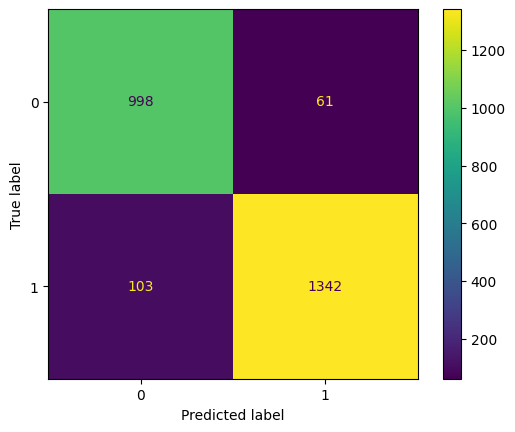

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, nb_y_pred)
ConfusionMatrixDisplay(cm).plot()


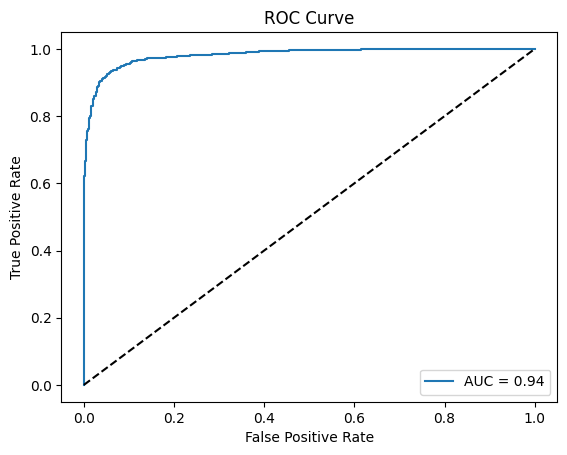

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# 4. SVM algorithm :



In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC(max_iter=10000)

svm.fit(X_train, y_train)

svm_y_pred = svm.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

accuracy_train = accuracy_score(y_train,  svm.predict(X_train))
accuracy_test =accuracy_score(y_test, svm_y_pred)
recall = recall_score(y_test, svm_y_pred)
precision = precision_score(y_test, svm_y_pred)
f1 = f1_score(y_test, svm_y_pred)
auc = roc_auc_score(y_test, svm_y_pred)


print("The accuracy on training set of suport vector machine :", round(accuracy_train * 100, 2), "%")
print("The accuracy on testing set of suport vector machine :", round(accuracy_test * 100, 2), "%")
print("Recall: ",round(recall * 100, 2), "%")
print("Precision: ",round(precision * 100, 2), "%")
print("F1-Score:",round(f1 * 100, 2), "%")
print("AUC Score:", round(auc * 100, 2), "%")

The accuracy on training set of suport vector machine : 100.0 %
The accuracy on testing set of suport vector machine : 92.17 %
Recall:  94.95 %
Precision:  91.77 %
F1-Score: 93.33 %
AUC Score: 91.67 %


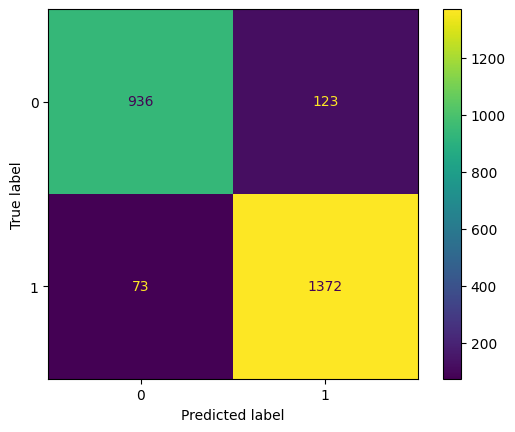

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, svm_y_pred)
ConfusionMatrixDisplay(cm).plot()


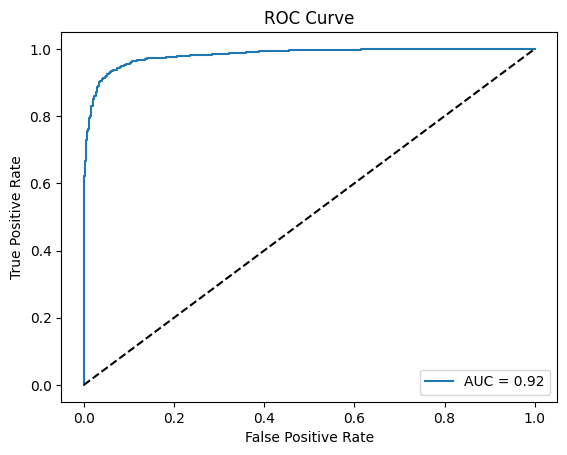

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 115.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 111.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.9 MB/s eta 0:00:00


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dense_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

dense_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

dense_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

dense_preds = (dense_model.predict(X_test) > 0.5).astype("int32")
dense_probs = dense_model.predict(X_test)

accuracy_train = dense_model.evaluate(X_train, y_train, verbose=0)[1]
accuracy_test = accuracy_score(y_test, dense_preds)
precision = precision_score(y_test, dense_preds)
recall = recall_score(y_test, dense_preds)
f1 = f1_score(y_test, dense_preds)
auc = roc_auc_score(y_test, dense_probs)

# Print results
print("The accuracy on training set of Dense Neural Network :", round(accuracy_train * 100, 2), "%")
print("The accuracy on testing set of Dense Neural Network :", round(accuracy_test * 100, 2), "%")
print("Recall: ", round(recall * 100, 2), "%")
print("Precision: ", round(precision * 100, 2), "%")
print("F1-Score:", round(f1 * 100, 2), "%")
print("AUC Score:", round(auc * 100, 2), "%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 39s 132ms/step - accuracy: 0.8381 - loss: 0.3795 - val_accuracy: 0.9271 - val_loss: 0.1875
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 34s 121ms/step - accuracy: 0.9879 - loss: 0.0334 - val_accuracy: 0.9261 - val_loss: 0.2323
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 31s 111ms/step - accuracy: 0.9995 - loss: 0.0039 - val_accuracy: 0.9271 - val_loss: 0.2671
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 30s 108ms/step - accuracy: 1.0000 - loss: 7.7460e-04 - val_accuracy: 0.9271 - val_loss: 0.2959
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 31s 109ms/step - accuracy: 1.0000 - loss: 3.9532e-04 - val_accuracy: 0.9271 - val_loss: 0.3162
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
The accuracy on training set of Dense Neural Network : 99.27 %
The accuracy on testing set of Dense Neural Network : 93.41 %
Recall:  95.5 %
Precision:  93.24 %
F1-Score: 94.36 %
AUC Score: 97.95 %


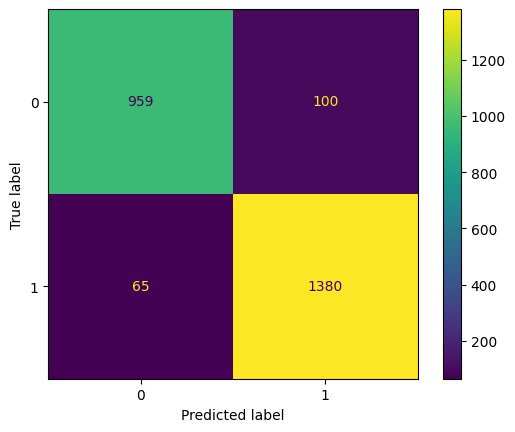

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, dense_preds)
ConfusionMatrixDisplay(cm).plot()


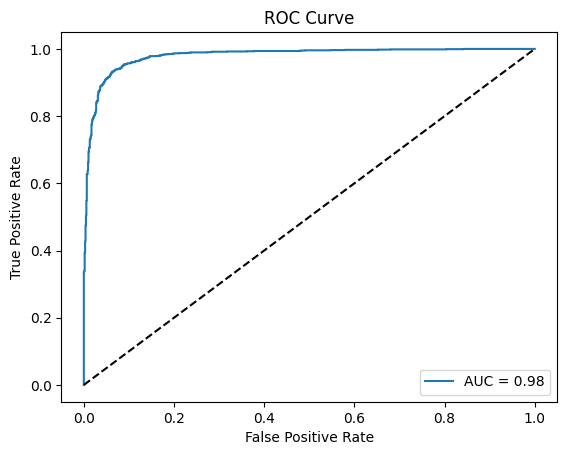

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, dense_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

# Step 2: Padding
max_len = 200
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Step 3: Define vocab_size
vocab_size = len(tokenizer.word_index) + 1

# Step 4: Prepare labels
y = df['label']

# Step 5: Train-test split
X_train_seq, X_test_seq, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

# Step 6: CNN Model
cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_split=0.1)

accuracy_train = cnn_model.evaluate(X_train_seq, y_train, verbose=0)[1]

cnn_preds = (cnn_model.predict(X_test_seq) > 0.5).astype("int32")
cnn_probs = cnn_model.predict(X_test_seq)


accuracy_test = accuracy_score(y_test, cnn_preds)
precision = precision_score(y_test, cnn_preds)
recall = recall_score(y_test, cnn_preds)
f1 = f1_score(y_test, cnn_preds)
auc = roc_auc_score(y_test, cnn_probs)


print("The accuracy on training set of CNN :", round(accuracy_train * 100, 2), "%")
print("The accuracy on testing set of CNN  :", round(accuracy_test * 100, 2), "%")
print("Recall: ", round(recall * 100, 2), "%")
print("Precision: ", round(precision * 100, 2), "%")
print("F1-Score:", round(f1 * 100, 2), "%")
print("AUC Score:", round(auc * 100, 2), "%")

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


282/282 ━━━━━━━━━━━━━━━━━━━━ 52s 180ms/step - accuracy: 0.7561 - loss: 0.5277 - val_accuracy: 0.9261 - val_loss: 0.1945
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 49s 175ms/step - accuracy: 0.9762 - loss: 0.0703 - val_accuracy: 0.9361 - val_loss: 0.1703
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 48s 171ms/step - accuracy: 0.9984 - loss: 0.0090 - val_accuracy: 0.9441 - val_loss: 0.1870
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 49s 173ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9401 - val_loss: 0.2045
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 49s 172ms/step - accuracy: 1.0000 - loss: 4.3293e-04 - val_accuracy: 0.9381 - val_loss: 0.2159
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
The accuracy on training set of CNN : 99.38 %
The accuracy on testing set of CNN  : 93.97 %
Recall:  94.6 %
Precision:  94.93 %
F1-Score: 94.77 %
AUC Score: 98.54 %


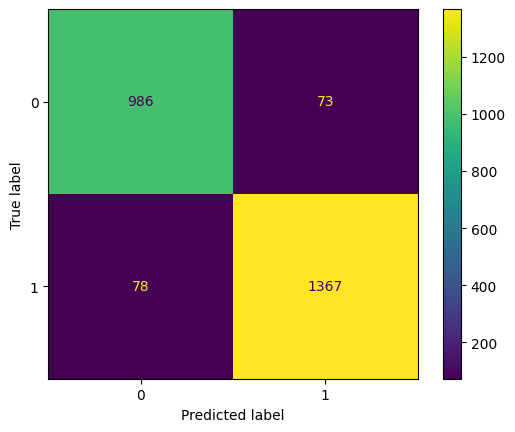

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, cnn_preds)
ConfusionMatrixDisplay(cm).plot()


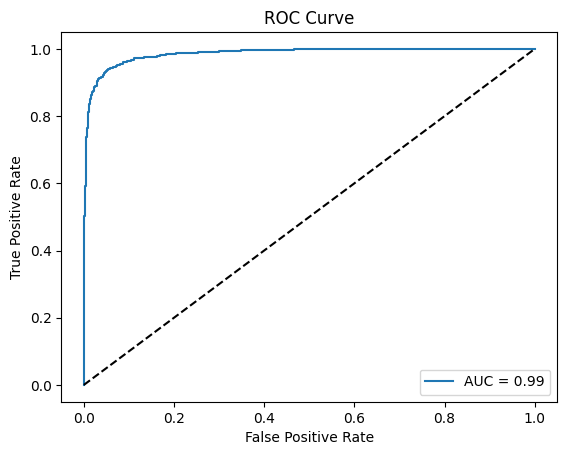

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, cnn_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
